# Numerically solving the Duffing Equation

The Duffing equation is given by  
$$
\ddot{x} + k\dot{x} -x + x^3 = \Gamma \cos \omega t,
$$
where $k$, $\Gamma$ and $\omega$ are constants, is often used in modelling certain forced damped oscillators.  Here we show how to use python to obtain numerical solutions.

First we write the above equation as a system of two equation.  Let $\dot{x} = v$ and $\ddot{x} = \dot{v}$.  Then the above equation can be written as the system of two first order differential equations  
\begin{equation}
\begin{array}{rcl}
    \dot{x} & = & v \\
    \dot{v} & = & -kv + x - x^3 + \Gamma \cos \omega t,
\end{array}
\end{equation}
where $k$, $\Gamma$ and $\omega$ are constants.  

Below we solve this system using odeint.

First we get the need libraries

In [38]:
import numpy as np  # import numpy to get the cos function
from scipy.integrate import odeint  # here we import odeint from scipy
from matplotlib import pyplot as plt # need pyplot to graph solutions

Next we define the right hand side to the system of ordinary differential equations as a function.  We also feed in the constants.


In [39]:
def duffing(y,t,k,gamma,omega):
    # Duffing equation,  as a system of first order differential equations
    # k, gamma and omega are going to be parameters fed into odeint
    x = y[0]
    xdot = y[1]
    vdot = -k*xdot + x - x**3 + gamma*np.cos(omega*t)
    return [xdot,vdot]


Next we define the initial conditions and the values of the constants. Also we define the times which we want odeint to give us solutions at.

In [40]:

t0 = np.linspace(0,100,5000)
x0 = [.817,0]
k = .3
omega = 1.2
gamma = .50

args = (k,gamma,omega)



Now we call odeint and save the solution in the variable sol.  We also plot the solutions

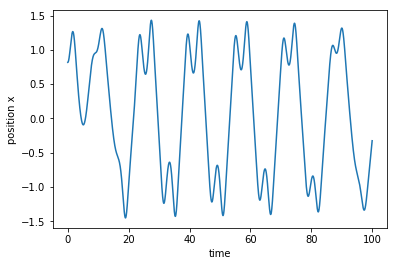

In [41]:

sol = odeint(duffing,x0,t0,args,rtol=1.0e-12)

plt.xlabel("time")
plt.ylabel("position x")
plt.plot(t0,sol[:,0])
plt.show()


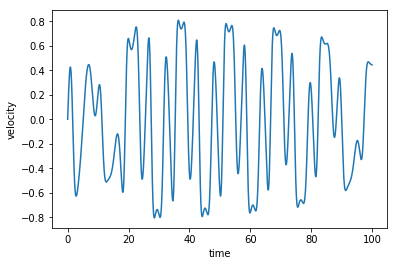

In [42]:
plt.xlabel("time")
plt.ylabel("velocity")
plt.plot(t0,sol[:,1])
plt.show()